In [26]:
import cv2
import numpy as np

def mask_to_vertices(mask, simplify_threshold=0.5):
    """
    Convert a pixel mask to a list of vertices.
    
    Args:
        mask (np.ndarray): A pixel mask.
        threshold (int): The threshold value for binarizing the mask.
        simplify_threshold (float): The threshold for simplifying the contours.
    
    Returns:
        list: A list of vertices, where each vertex is a list of [x, y] coordinates.
    """
    # Binarize the mask
    _, binary_mask = cv2.threshold(mask, 0, 255, cv2.THRESH_BINARY)
    
    # Convert the binary mask to the correct format
    binary_mask = binary_mask.astype(np.uint8)
    
    # Find contours
    contours, _ = cv2.findContours(binary_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Simplify the contours
    vertices = []
    for contour in contours:
        epsilon = simplify_threshold * cv2.arcLength(contour, True)
        simplified_contour = cv2.approxPolyDP(contour, epsilon, True)
        vertices.append(simplified_contour.squeeze().tolist())
    
    return vertices

In [48]:
import matplotlib.pyplot as plt

def visualize_vertices(mask, vertices):
    """
    Visualize the vertices on the original mask using Matplotlib.
    
    Args:
        mask (np.ndarray): The original pixel mask.
        vertices (list): A list of vertices, where each vertex is a list of [x, y] coordinates.
    """
    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(8, 8))
    
    # Plot the original mask
    ax.imshow(mask, cmap='gray')
    
    # Plot the vertices
    for vertex_list in vertices:
        x, y = zip(vertex_list)
        ax.plot(x, y, 'ro-', linewidth=2, markersize=3)
    
    # Set the title and axis labels
    ax.set_title('Visualized Vertices')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    
    # Show the plot
    plt.show()

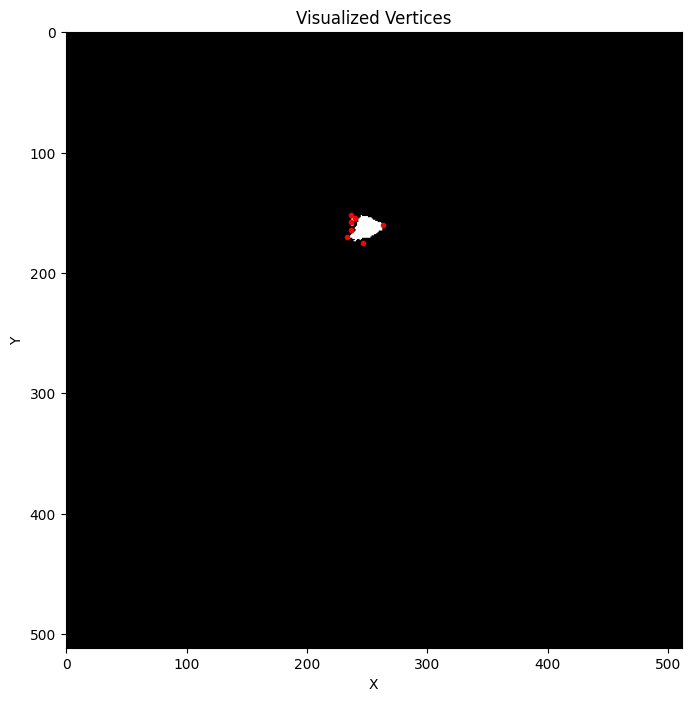

In [49]:
import nibabel as nib
data = nib.load("data/masks/study_0255_mask.nii.gz").get_fdata()

vertices = mask_to_vertices(data[:, :, 30])
visualized_mask = visualize_vertices(data[:, :, 30], vertices)

In [65]:
import cv2
import numpy as np
from shapely.geometry import Polygon
import matplotlib.pyplot as plt

def mask_to_vertices(mask, simplify_threshold=0.5):
    """
    Convert a pixel mask to a list of vertices.
    
    Args:
        mask (np.ndarray): A pixel mask.
        threshold (int): The threshold value for binarizing the mask.
        simplify_threshold (float): The threshold for simplifying the contours.
    
    Returns:
        list: A list of vertices, where each vertex is a list of [x, y] coordinates.
    """
    # Binarize the mask
    _, binary_mask = cv2.threshold(mask, 0, 255, cv2.THRESH_BINARY)
    
    # Convert the binary mask to the correct format
    binary_mask = binary_mask.astype(np.uint8)
    
    # Find contours
    contours, _ = cv2.findContours(binary_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Simplify the contours
    vertices = []
    for contour in contours:
        epsilon = simplify_threshold * cv2.arcLength(contour, True)
        simplified_contour = cv2.approxPolyDP(contour, epsilon, True)
        vertices.append(simplified_contour.squeeze().tolist())
    
    return vertices

def vertices_to_polygon(vertices):
    """
    Convert a list of vertices to a Polygon object.
    
    Args:
        vertices (list): A list of vertices, where each vertex is a list of [x, y] coordinates.
    
    Returns:
        list: A list of Polygon objects, one for each set of vertices.
    """
    polygons = []
    # for vertex_list in vertices:
    polygon = Polygon(vertices)
    polygons.append(polygon)
    return polygons

def visualize_polygon(mask, polygons, output_size=(512, 512), color='r', linewidth=2):
    """
    Visualize the polygons on the original mask using Matplotlib.
    
    Args:
        mask (np.ndarray): The original pixel mask.
        polygons (list): A list of Polygon objects.
        output_size (tuple): The size of the output image.
        color (str): The color of the polygons.
        linewidth (int): The thickness of the polygon borders.
    """
    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(8, 8))
    
    # Plot the original mask
    ax.imshow(mask, cmap='gray')
    
    # Plot the polygons
    for polygon in polygons:
        x, y = polygon.exterior.xy
        ax.plot(x, y, color=color, linewidth=linewidth)
    
    # Set the title and axis labels
    ax.set_title('Visualized Polygons')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    
    # Show the plot
    plt.show()

[[247, 175], [233, 170], [237, 164], [237, 158], [240, 154], [263, 160], [237, 152]]


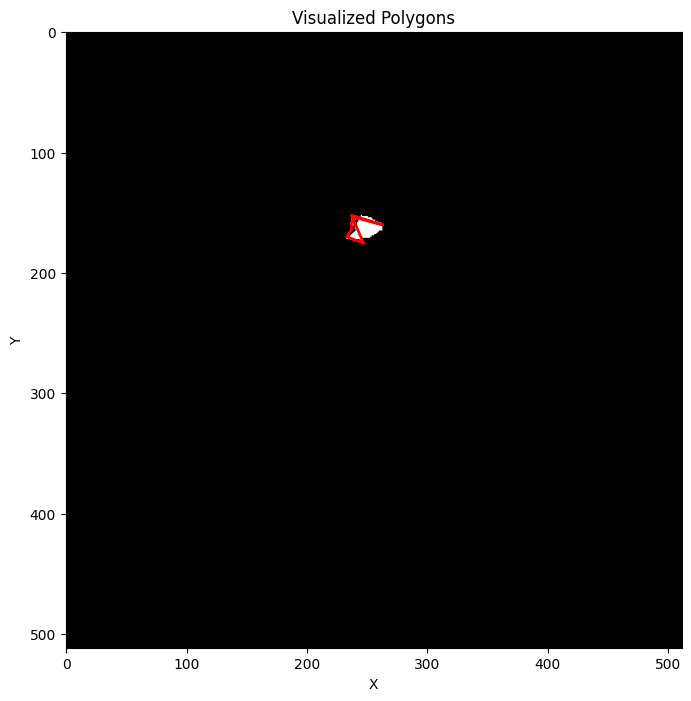

In [66]:
vertices = mask_to_vertices(data[:, :, 30])
print(vertices)
polygons = vertices_to_polygon(vertices)
visualize_polygon(data[:, :, 30], polygons)

In [67]:
import cv2
import numpy as np
import nibabel as nib

# Load the NIfTI file
nifti_file = 'data/masks/study_0255_mask.nii.gz'
nifti_image = nib.load(nifti_file)
nifti_data = nifti_image.get_fdata()

# Iterate through each slice in the NIfTI file
for slice_idx in range(nifti_data.shape[2]):
    # Extract the binary mask for the current slice
    mask_slice = nifti_data[:, :, slice_idx]

    # Find contours in the binary mask
    contours, _ = cv2.findContours(np.uint8(mask_slice), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Create a list to store the polygons for the current slice
    polygons = []

    # Loop through the contours and convert them to polygons
    for contour in contours:
        # Approximate the contour with a polygon
        polygon = cv2.approxPolyDP(contour, 0.01 * cv2.arcLength(contour, True), True)
        
        # Add the polygon to the list
        polygons.append(polygon.squeeze())

    # The polygons list now contains the polygons for each blob in the current slice
    print(f"Slice {slice_idx}: {len(polygons)} polygons found")

Slice 0: 0 polygons found
Slice 1: 0 polygons found
Slice 2: 0 polygons found
Slice 3: 0 polygons found
Slice 4: 0 polygons found
Slice 5: 0 polygons found
Slice 6: 0 polygons found
Slice 7: 0 polygons found
Slice 8: 0 polygons found
Slice 9: 0 polygons found
Slice 10: 5 polygons found
Slice 11: 23 polygons found
Slice 12: 27 polygons found
Slice 13: 17 polygons found
Slice 14: 11 polygons found
Slice 15: 21 polygons found
Slice 16: 25 polygons found
Slice 17: 26 polygons found
Slice 18: 18 polygons found
Slice 19: 12 polygons found
Slice 20: 19 polygons found
Slice 21: 10 polygons found
Slice 22: 14 polygons found
Slice 23: 15 polygons found
Slice 24: 11 polygons found
Slice 25: 10 polygons found
Slice 26: 6 polygons found
Slice 27: 0 polygons found
Slice 28: 7 polygons found
Slice 29: 4 polygons found
Slice 30: 7 polygons found
Slice 31: 3 polygons found
Slice 32: 0 polygons found
Slice 33: 0 polygons found
Slice 34: 0 polygons found
Slice 35: 0 polygons found
Slice 36: 0 polygons fo

In [74]:
import cv2
import numpy as np
import nibabel as nib

# Load the NIfTI file
nifti_file = 'data/masks/study_0255_mask.nii.gz'
nifti_image = nib.load(nifti_file)
nifti_data = nifti_image.get_fdata()

# Create a list to store all the polygons
all_polygons = []

# Iterate through each slice in the NIfTI file
for slice_idx in range(nifti_data.shape[2]):
    # Extract the binary mask for the current slice
    mask_slice = nifti_data[:, :, slice_idx]

    # Find contours in the binary mask
    contours, _ = cv2.findContours(np.uint8(mask_slice), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Create a list to store the polygons for the current slice
    polygons = []

    # Loop through the contours and convert them to polygons
    for contour in contours:
        # Approximate the contour with a polygon
        polygon = cv2.approxPolyDP(contour, 0.01 * cv2.arcLength(contour, True), True)
        
        # Add the polygon to the list
        polygons.append(polygon)

    # Add the polygons for the current slice to the overall list
    all_polygons.extend(polygons)

# Create a blank image to draw the polygons on
image_size = nifti_image.shape[:2]
blank_image = np.zeros((image_size[0], image_size[1], 3), dtype=np.uint8)

# Draw the polygons on the blank image
cv2.polylines(blank_image, all_polygons, True, (0, 255, 0), 2)

# Display the image with the polygons
cv2.imshow('Polygons', blank_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [80]:
import cv2
import numpy as np
import nibabel as nib
from scipy.spatial.distance import cdist

def group_polygons(polygons, max_distance=20):
    """
    Group the polygons that are close to each other.
    """
    grouped_polygons = []
    for i, p1 in enumerate(polygons):
        found_group = False
        for g in grouped_polygons:
            # Calculate the distance between the centroids of the polygons
            centroid1 = np.mean(p1, axis=0)
            centroid2 = np.mean(g[0], axis=0)
            distance = np.linalg.norm(centroid1 - centroid2)
            if distance < max_distance:
                g.append(p1)
                found_group = True
                break
        if not found_group:
            grouped_polygons.append([p1])
    return [np.concatenate(g, axis=0) for g in grouped_polygons]

# Load the NIfTI file
nifti_file = 'data/masks/study_0255_mask.nii.gz'
nifti_image = nib.load(nifti_file)
nifti_data = nifti_image.get_fdata()

# Create a list to store all the polygons
all_polygons = []

# Iterate through each slice in the NIfTI file
for slice_idx in range(nifti_data.shape[2]):
    # Extract the binary mask for the current slice
    mask_slice = nifti_data[:, :, slice_idx]

    # Find contours in the binary mask
    contours, _ = cv2.findContours(np.uint8(mask_slice), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Create a list to store the polygons for the current slice
    polygons = []

    # Loop through the contours and convert them to polygons
    for contour in contours:
        # Approximate the contour with a polygon
        polygon = cv2.approxPolyDP(contour, 0.01 * cv2.arcLength(contour, True), True)
        
        # Add the polygon to the list
        polygons.append(polygon)

    # Group the polygons that are close to each other
    grouped_polygons = group_polygons(polygons, max_distance=20)

    # Add the grouped polygons to the overall list
    all_polygons.extend(grouped_polygons)

# Create a blank image to draw the polygons on
image_size = nifti_image.shape[:2]
blank_image = np.zeros((image_size[0], image_size[1], 3), dtype=np.uint8)

# Draw the polygons on the blank image
cv2.polylines(blank_image, all_polygons[6], True, (0, 255, 0), 2)

# Display the image with the polygons
cv2.imshow('Polygons', blank_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
import cv2
import numpy as np
import nibabel as nib
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

# Load the NIfTI file
nifti_file = 'data/masks/study_0255_mask.nii.gz'
nifti_image = nib.load(nifti_file)
nifti_data = nifti_image.get_fdata()

# Create a list to store all the polygons
all_polygons = []

def group_polygons(polygons, max_distance=20):
    """
    Group the polygons that are close to each other.
    """
    grouped_polygons = []
    for i, p1 in enumerate(polygons):
        found_group = False
        for g in grouped_polygons:
            # Calculate the distance between the centroids of the polygons
            centroid1 = np.mean(p1, axis=0)
            centroid2 = np.mean(g[0], axis=0)
            distance = np.linalg.norm(centroid1 - centroid2)
            if distance < max_distance:
                g.append(p1)
                found_group = True
                break
        if not found_group:
            grouped_polygons.append([p1])
    return [np.concatenate(g, axis=0) for g in grouped_polygons]

# Iterate through each slice in the NIfTI file
for slice_idx in range(nifti_data.shape[2]):
    # Extract the binary mask for the current slice
    mask_slice = nifti_data[:, :, slice_idx]

    # Find contours in the binary mask
    contours, _ = cv2.findContours(np.uint8(mask_slice), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Create a list to store the polygons for the current slice
    polygons = []

    # Loop through the contours and convert them to polygons
    for contour in contours:
        # Approximate the contour with a polygon
        polygon = cv2.approxPolyDP(contour, 0.01 * cv2.arcLength(contour, True), True)
        
        # Add the polygon to the list
        polygons.append(polygon)

    # Group the polygons that are close to each other
    grouped_polygons = group_polygons(polygons, max_distance=20)

    # Add the grouped polygons to the overall list
    all_polygons.extend(grouped_polygons)

# Visualize the polygons one by one
for polygon in all_polygons:
    # Create a new figure
    fig, ax = plt.subplots(figsize=(8, 8))

    # Plot the binary mask
    ax.imshow(nifti_data[:, :, slice_idx], cmap='gray')

    # Plot the polygon
    ax.plot(polygon[:, 0, 0], polygon[:, 0, 1], color='red', linewidth=2)
    ax.plot(polygon[0, 0, 0], polygon[0, 0, 1], 'ro', markersize=2)

    # Set the aspect ratio to be equal
    ax.set_aspect('equal')

    # Show the plot
    plt.show()



IndexError: index 1 is out of bounds for axis 2 with size 1

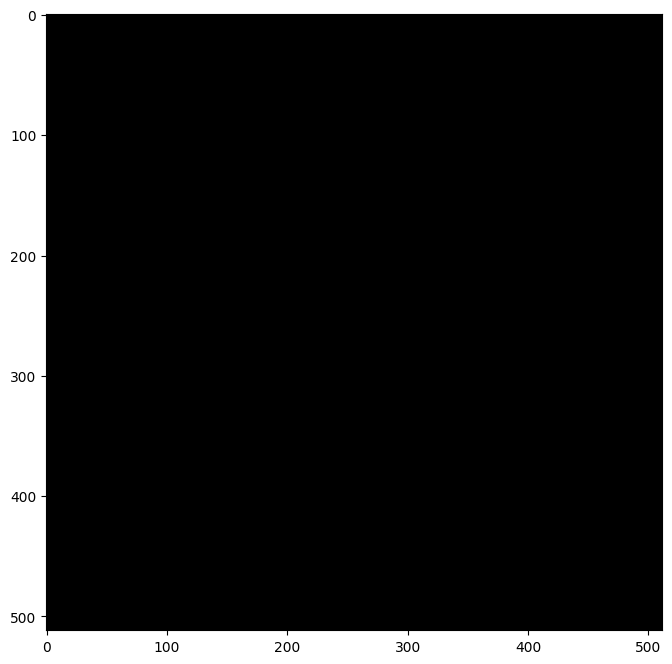

In [88]:
import cv2
import numpy as np
import nibabel as nib
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

def simplify_polygon(polygon, max_vertices=6):
    """
    Simplify the polygon to around the specified number of vertices.
    """
    # Check if the polygon has enough vertices to simplify
    if len(polygon) <= max_vertices:
        return polygon

    # Compute the cumulative arc length of the polygon
    arc_lengths = np.cumsum(np.sqrt(np.sum(np.diff(polygon, axis=0) ** 2, axis=1)))
    total_length = arc_lengths[-1]

    # Determine the desired vertex spacing
    desired_spacing = total_length / (max_vertices - 1)

    # Resample the polygon to the desired number of vertices
    simplified_polygon = []
    current_position = 0
    for i in range(max_vertices):
        target_position = i * desired_spacing
        while current_position < len(arc_lengths) and arc_lengths[current_position] < target_position:
            current_position += 1
        if current_position == 0:
            simplified_polygon.append(polygon[0])
        elif current_position >= len(polygon):
            simplified_polygon.append(polygon[-1])
        else:
            alpha = (target_position - arc_lengths[current_position - 1]) / (arc_lengths[current_position] - arc_lengths[current_position - 1])
            simplified_polygon.append(polygon[current_position - 1] * (1 - alpha) + polygon[current_position] * alpha)
    return np.array(simplified_polygon)

def group_polygons(polygons, max_distance=20):
    """
    Group the polygons that are close to each other.
    """
    grouped_polygons = []
    for i, p1 in enumerate(polygons):
        found_group = False
        for g in grouped_polygons:
            # Calculate the distance between the centroids of the polygons
            centroid1 = np.mean(p1, axis=0)
            centroid2 = np.mean(g[0], axis=0)
            distance = np.linalg.norm(centroid1 - centroid2)
            if distance < max_distance and len(p1) == len(g[0]):
                g.append(p1)
                found_group = True
                break
        if not found_group:
            grouped_polygons.append([p1])
    return [np.array(g) for g in grouped_polygons]

# Load the NIfTI file
nifti_file = 'data/masks/study_0255_mask.nii.gz'
nifti_image = nib.load(nifti_file)
nifti_data = nifti_image.get_fdata()

# Create a list to store all the polygons
all_polygons = []

# Iterate through each slice in the NIfTI file
for slice_idx in range(nifti_data.shape[2]):
    # Extract the binary mask for the current slice
    mask_slice = nifti_data[:, :, slice_idx]

    # Find contours in the binary mask
    contours, _ = cv2.findContours(np.uint8(mask_slice), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Create a list to store the polygons for the current slice
    polygons = []

    # Loop through the contours and convert them to polygons
    for contour in contours:
        # Approximate the contour with a polygon
        polygon = cv2.approxPolyDP(contour, 0.01 * cv2.arcLength(contour, True), True)
        
        # Simplify the polygon to around 5-6 vertices
        simplified_polygon = simplify_polygon(polygon, max_vertices=6)
        
        # Close the polygon
        simplified_polygon = np.concatenate([simplified_polygon, [simplified_polygon[0]]], axis=0)
        
        # Add the simplified and closed polygon to the list
        polygons.append(simplified_polygon)

    # Group the polygons that are close to each other
    grouped_polygons = group_polygons(polygons, max_distance=20)

    # Add the grouped polygons to the overall list
    all_polygons.extend(grouped_polygons)

# Visualize the polygons one by one
for polygon in all_polygons:
    # Create a new figure
    fig, ax = plt.subplots(figsize=(8, 8))

    # Plot the binary mask
    ax.imshow(nifti_data[:, :, slice_idx], cmap='gray')

    # Plot the polygon
    if polygon.shape[1] > 1:
        ax.plot(polygon[:, 0, 0], polygon[:, 0, 1], color='red', linewidth=2)
        ax.plot(polygon[0, 0, 0], polygon[0, 0, 1], 'ro', markersize=10)
    else:
        # If the polygon has only one vertex, plot a single point
        ax.plot(polygon[0, 0, 0], polygon[0, 0, 1], 'ro', markersize=10)

    # Set the aspect ratio to be equal
    ax.set_aspect('equal')

    # Show the plot
    plt.show()

In [3]:
import nibabel as nib
import numpy as np
from skimage.measure import label, find_contours
from shapely.geometry import Polygon
from shapely import simplify

def process_nii_file(file_path):
    # Load the .nii file
    img = nib.load(file_path)
    data = img.get_fdata()

    # Binarize the data (assuming the input is not binary)
    data_binary = (data > data.mean()).astype(int)

    polygons = []

    # Loop through each slice where a mask is present
    for slice_idx in range(data_binary.shape[2]):
        slice_data = data_binary[:, :, slice_idx]
        
        # Detect blobs (islands) of pixels
        labeled_blobs, num_blobs = label(slice_data, return_num=True)
        
        # Convert blobs to closed polygons and simplify them
        for blob_idx in range(1, num_blobs + 1):
            blob_mask = (labeled_blobs == blob_idx)
            contours = find_contours(blob_mask, 0.5)
            
            # Assume there is only one contour per blob
            contour = contours[0]
            
            # Convert the contour to a polygon and simplify it
            polygon = Polygon(contour)
            simplified_polygon = simplify(polygon, tolerance=10)
            
            polygons.append(simplified_polygon)
    
    return polygons

In [4]:
def process_nii_file(file_path, area_thresh=5, simp_tol=1):
    # Load the .nii file
    img = nib.load(file_path)
    data = img.get_fdata()

    # Binarize the data (assuming the input is not binary)
    data_binary = (data > data.mean()).astype(int)

    polygons_with_metadata = []

    # Loop through each slice where a mask is present
    for slice_idx in range(data_binary.shape[2]):
        slice_data = data_binary[:, :, slice_idx]
        
        # Detect blobs (islands) of pixels
        labeled_blobs, num_blobs = label(slice_data, return_num=True)
        
        # Convert blobs to closed polygons and simplify them
        for blob_idx in range(1, num_blobs + 1):
            blob_mask = (labeled_blobs == blob_idx)
            contours = find_contours(blob_mask, 0.5, fully_connected='high')
            
            # Assume there is only one contour per blob
            contour = contours[0]
            
            # Convert the contour to a polygon and simplify it
            polygon = Polygon(contour)
            simplified_polygon = simplify(polygon, tolerance=simp_tol, preserve_topology=True)
            
            # Store the slice index, polygon, and file path
            if simplified_polygon.area > area_thresh:
                polygons_with_metadata.append((slice_idx, simplified_polygon, file_path))
    
    return polygons_with_metadata

In [5]:
file_path = 'data/masks/study_0255_mask.nii.gz'
polygons = process_nii_file(file_path)
polygons

[(10,
  <POLYGON ((157.5 284, 157.5 281, 156 278.5, 152.5 282, 156 285.5, 157.5 284))>,
  'data/masks/study_0255_mask.nii.gz'),
 (10,
  <POLYGON ((161.5 272, 158 268.5, 153.5 275, 157 277.5, 161.5 272))>,
  'data/masks/study_0255_mask.nii.gz'),
 (11,
  <POLYGON ((160.5 236, 160 234.5, 158 235.5, 156.5 234, 158 232.5, 160.5 233,...>,
  'data/masks/study_0255_mask.nii.gz'),
 (11,
  <POLYGON ((145.5 254, 141.5 247, 141 244.5, 141.5 250, 145.5 254))>,
  'data/masks/study_0255_mask.nii.gz'),
 (11,
  <POLYGON ((165.5 277, 164.5 274, 158.5 269, 158.5 261, 157 259.5, 155 262.5,...>,
  'data/masks/study_0255_mask.nii.gz'),
 (11,
  <POLYGON ((165.5 247, 164 244.5, 160.5 251, 161 253.5, 165.5 247))>,
  'data/masks/study_0255_mask.nii.gz'),
 (11,
  <POLYGON ((382.5 232, 382 228.5, 377 228.5, 375.5 227, 375.5 224, 378.5 221,...>,
  'data/masks/study_0255_mask.nii.gz'),
 (11,
  <POLYGON ((353.5 209, 353 207.5, 349 210.5, 347.5 214, 350 214.5, 350.5 211,...>,
  'data/masks/study_0255_mask.nii.gz'),
 

In [208]:
polygons[0][1].exterior.coords[0]

(157.5, 284.0)

In [6]:
def visualize_polygons(polygons_with_metadata, slice_idx):
    # Find the polygons for the given slice index
    slice_polygons = [poly for i, poly, _ in polygons_with_metadata if i == slice_idx]

    # Load the .nii file and get the data for the given slice
    file_path = polygons_with_metadata[0][2]
    img = nib.load(file_path)
    data = img.get_fdata()
    slice_data = data[:, :, slice_idx]

    # Create the figure and axis
    fig, ax = plt.subplots(figsize=(10, 10))

    # Plot the original slice data
    ax.imshow(slice_data, cmap='gray')

    # Plot the polygons on top of the slice data
    for polygon in slice_polygons:
        y, x = polygon.exterior.xy
        ax.plot(x, y, color='r', linewidth=1)

    ax.set_title(f"Slice {slice_idx}")
    plt.show()


In [192]:
set(map(lambda x: x[0], polygons))

{10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 28,
 29,
 30}

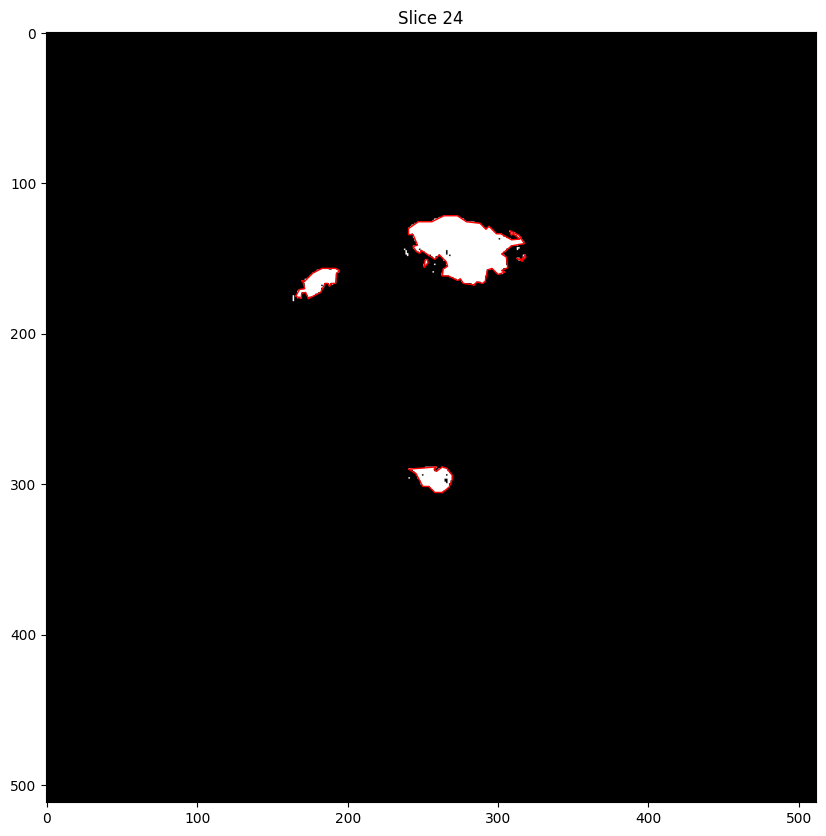

In [9]:
polygons_with_metadata = process_nii_file('data/masks/study_0255_mask.nii.gz')
visualize_polygons(polygons_with_metadata, slice_idx=24)

In [209]:
def save_to_yolo_format(polygons_with_metadata, output_file):
    img = np.zeros((512, 512))
    with open(output_file, 'w') as f:
        for slice_idx, polygon, file_path in polygons_with_metadata:
            # Get the coordinates of the polygon's exterior
            y, x = polygon.exterior.xy

            # Convert the coordinates to the YOLO format
            yolo_coords = [0]
            for i in range(len(x) - 1):
                yolo_coords.extend([x[i] / img.shape[1], y[i] / img.shape[0]])

            # Write the YOLO format line to the file
            f.write(' '.join(map(str, yolo_coords)) + '\n')

output_file = 'yolo_format_output.txt'
save_to_yolo_format(polygons_with_metadata, output_file)
print(f"YOLO format output saved to: {output_file}")

YOLO format output saved to: yolo_format_output.txt


In [220]:
for a in polygons[0][1].exterior.coords:
    print(a[1]/512, a[0]/512)

0.5546875 0.3076171875
0.548828125 0.3076171875
0.5439453125 0.3046875
0.55078125 0.2978515625
0.5576171875 0.3046875
0.5546875 0.3076171875
